# Second Task
* Prediction using Unsupervised ML

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import os

import matplotlib.pyplot as plt 

from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

## Getting Data 

In [2]:
df=pd.read_csv("Iris.csv") #Loading the dataset

## Data Analysis

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.describe() #statistical description of the dataset

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [5]:
df.info() #general information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [7]:
df.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [8]:
# Removing identifying columns because it is unsupervised learning model
iris = pd.DataFrame(df)
iris_df = iris.drop(columns= ['Species' ,'Id'] )
iris_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## Model Building

In [9]:
wcss=[]
for k in range(1, 11):
    print(f'training with {k} nunber of clusters')
    model=KMeans(n_clusters=k)
    model.fit(iris_df)
    wcss.append(model.inertia_)
print("WCSS",wcss)

training with 1 nunber of clusters
training with 2 nunber of clusters
training with 3 nunber of clusters
training with 4 nunber of clusters
training with 5 nunber of clusters
training with 6 nunber of clusters
training with 7 nunber of clusters
training with 8 nunber of clusters
training with 9 nunber of clusters
training with 10 nunber of clusters
WCSS [680.8243999999996, 152.36870647733915, 78.94084142614601, 57.317873214285726, 46.535582051282034, 38.930963049671746, 34.32652991452991, 30.071651126651133, 27.919951528863308, 26.307968939834215]


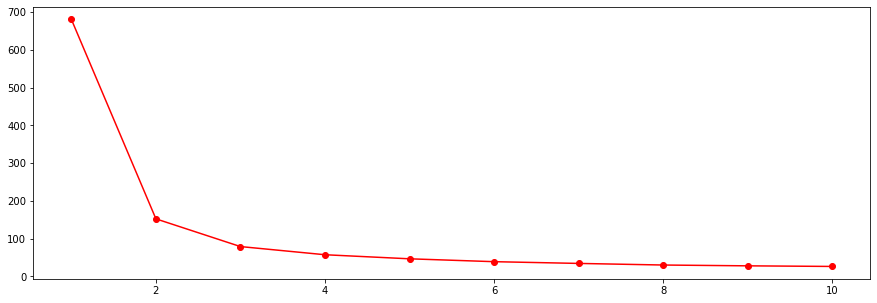

In [10]:
# PLotting the elbow graph
plt.figure(figsize=(15,5))
plt.plot(range(1,11), wcss, 'o-r')
plt.show()

In [11]:
#Elbow occurs at 3 hence number of clusters chosen is 3 
k=3
cl_model=KMeans(n_clusters=k,init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
cl_model.fit(iris_df)

KMeans(n_clusters=3, random_state=0)

In [12]:
Category=cl_model.fit_predict(iris_df)

## Prediction Visualizaton

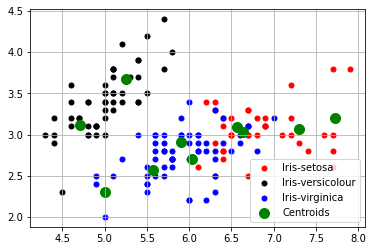

In [13]:
x = iris_df.iloc[:, [0, 1, 2, 3]].values
plt.scatter(x[Category == 0, 0], x[Category == 0, 1], s = 25, c = 'red', label = 'Iris-setosa')
plt.scatter(x[Category == 1, 0], x[Category == 1, 1], s = 25, c = 'black', label = 'Iris-versicolour')
plt.scatter(x[Category == 2, 0], x[Category == 2, 1], s = 25, c = 'blue', label = 'Iris-virginica')

# Plotting the cluster centers

plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:,1], s = 100, c = 'green', label = 'Centroids')
plt.legend()
plt.grid()
plt.show()
